# Time integration Study Session

In [1]:
#Libraries
import numpy as np # Used to do some math
from scipy.integrate import odeint # Used to solve directly ODE
import matplotlib.pyplot as plt # Used to plot graph

## Part 1 : Forward and Backward Euler method


As a remainder, Forward and Backward Euler method let us solve ordinary differential equation. They have both their specificities that I will not
discuss here (see chapter 2 on time integration). Two things thougt, Forward/Explicit Euler method is easier but not stable for any time step and Backward/Implicit Euler method is harder but more stable. I will also try to show that here.  

### Exo 1

Find approximate solution to the initial value problem,

$\displaystyle \frac{dy}{dt} = -3y + 7e^{4t},\quad y(0)=2$,

on the interval $0 \le t \le 1$ using **explicit** and **implicit Euler methods**.

Compare approximate solutions with exact solution given by

$\displaystyle y(t)=e^{4t} + e^{-3t}$.

Show graphically that both explicit and implicit Euler methods are first-order accurate for a finite time interval.

Forward Euler:

$y^{n+1} = y^n + (-3y^n + 7e^{4t^n})dt$

Backward Euler:

$y^{n+1} = y^n + (-3y^{n+1} + 7e^{4t^{n+1}})dt$

or

$y^{n+1}(1 + 3dt) = y^n + 7e^{4t^{n+1}}dt$

In [2]:
# Initialise our parameters
ti = 0.0 # Initial time condition
tf = 1.0 # Final time condition
yi = 2.0 # Initial position condition
dt = 0.1 # Size of a time step
nt = int((tf-ti)/dt) # Number of time step to go from 'ti' to 'tf' with a size 'dt' 

'''
For 'nt' we use int() wich will transforme our value inside the braket into an integer.
For exemple : int(1.2) = 1
'''

"\nFor 'nt' we use int() wich will transforme our value inside the braket into an integer.\nFor exemple : int(1.2) = 1\n"

In [3]:
# Creating our containers to store our solutions

#------------------Forward---------------------
y_forward = np.empty(nt+1) # Create an empty array of size nt + 1
y_forward[0] = yi # Set up the first element of the list 'y_forward' to be the initial condition

'''
Here We've created a numpy array to store de solution of our equation at each time step. The size of this array is the number of time step plus one
to include the initial condition. We've used np.empty(x) wich create an empty array of size 'x'. Then we've setted up the first element of the list to be the 
initial condition.
remark : we could use a python list instead of a numpy array but it is faster to do operation with numpy.
'''

t = np.arange(nt+1) * dt # Create the time array

'''
We've used np.arange(x) to create the time variable. np.arange(x) create an numpy array of size 'x' that look like this : [0,1,2,3,...,x].
So here, with np.arange(nt+1), we've created an array that take values from 0 to nt + 1. 
'''

for i in range(nt): # For loop to get the solution at each time
    y_forward[i+1] = y_forward[i] + (-3 * y_forward[i] + 7 * np.exp(4 * t[i])) * dt # Compute the Forward Euler Scheme for my ODE

'''
Here we've compute the forward Euler scheme. We've used a for loop that take an argument ('i') that goes from 0 to nt. For each argument we get the
solution of y for next step using the value for the current one that we have compute before.

When i = 0, we have :
y_forward[1] = y_forward[0] + (-3 * y_forward[0] + 7 * np.exp(4 * t[0])) * dt
So we have found the value of y at the first time step, meaning at t = ti + 1 * dt = 0.1. 
To find this value we needed the value at the 0th time step, meaning at t = ti + 0 * dt = ti. But this value is the initial condition yi = 2.

When i = 1, we have :
y_forward[2] = y_forward[1] + (-3 * y_forward[1] + 7 * np.exp(4 * t[1])) * dt
So we have found the value of y at the second time step, meaning at t = ti + 2 * dt = 0.2. 
To find this value we needed the value at the first time step, meaning at t = ti + 1 * dt. But this value has been compute at the previous loop.
This is the value we found above at i = 1

Etc for each value of 'i' until i = nt where we found the value at nt + 1 wich is tf. 

At each loop we've stored the solution to the numpy array. So we have at the end an array of size nt + 1 and each value is the solution at the corresponding
time step.
So y_forward[0] is the initial condition, y_forward[1] is the solution at t = 0.1, ..., y_forward[nt + 1] is the solution at tf.

'''

#-----------------Backward---------------------
y_backward = np.empty(nt+1) # Create an empty array of size nt + 1
y_backward[0] = yi # Set up the first element of the list 'y_forward' to be the initial condition

'''
For the Backward Euler method, we've done the same as above with the Forward Euler method but the algorithm we've computed is different. All the 
python is the same so we will not go into details again.
Remark : We have already define 't' so we will not doing it again but you also need 't' for Backward Euler method. If you are doing an exercise using
only Backward Euler don't forget it.
'''

mult = 1 + 3 * dt # define a coefficient that we will use. just do that to not copy it every time
for i in range(nt): # For loop to get the solution at each time
    y_backward[i + 1] = y_backward[i] / mult + dt * 7 * np.exp(4 * t[i + 1]) / mult # Compute the Backward Euler Scheme for my ODE

In [4]:
# Solve the ODE with the function odeint of scipy library
def func(y, t): # define the right hand side of my function
    RHS = -3 * y + 7 * np.exp(4 * t)
    return RHS

'''
Here we want to use the function odeint of Scipy library to solve my ODE. To do that odeint need as a parameter the rigth hand side (RHS) of my 
function. So we are computing the RHS using python definition.
'''

y_odeint, info = odeint(func, yi, t, full_output=True)

'''
odeint is a function of the Scipy library that solve ODE. Scipy is a library that contain a lot of algorithm to solve problem numericaly using 
python (ODE, integration, Eigenvalue problem, ...). The function odeint solve ODE, it is based on FORTRAN library odepack wich is really fast and 
powerfull.
It takes multiple parameters as arguments : the function you want to integrate to solve the ODE, the initiale condition, the time at wich we want to solve y
and other secondary parameters like 'full_output' that return 'info' wich give us acces to additional information like the order or else.
odeint return an array containing the solution of the ODE at each time 't', here called 'y_odeint'.  
'''

"\nodeint is a function of the Scipy library that solve ODE. Scipy is a library that contain a lot of algorithm to solve problem numericaly using \npython (ODE, integration, Eigenvalue problem, ...). The function odeint solve ODE, it is based on FORTRAN library odepack wich is really fast and \npowerfull.\nIt takes multiple parameters as arguments : the function you want to integrate to solve the ODE, the initiale condition, the time at wich we want to solve y\nand other secondary parameters like 'full_output' that return 'info' wich give us acces to additional information like the order or else.\nodeint return an array containing the solution of the ODE at each time 't', here called 'y_odeint'.  \n"

In [5]:
# Compute the exact solution
y_exact = np.exp(4 * t) + np.exp(-3 * t) 

'''
We' ve computed the exact solution to compare it with Forward Euler method, Backward Euler method and odeint.
'''

"\nWe' ve computed the exact solution to compare it with Forward Euler method, Backward Euler method and odeint.\n"

'\nRemark : if you want information about matplotlib, go check the library documentation or the previous notebook about Taylor expansion.\n'

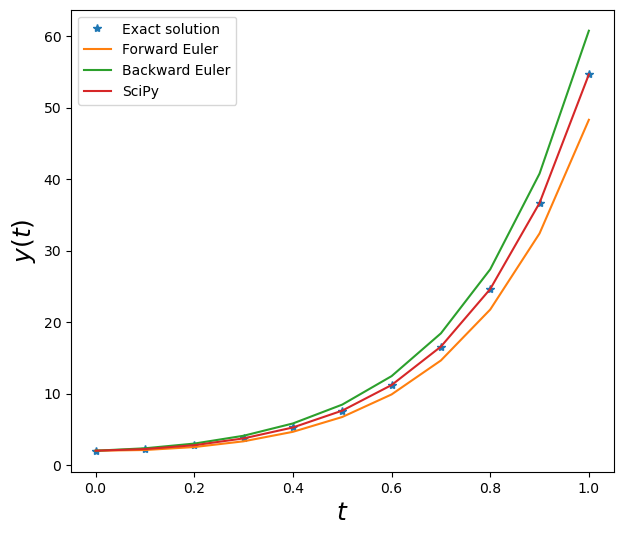

In [6]:
# Plot everything
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.plot(t, y_exact, '*', label="Exact solution")
ax.plot(t, y_forward, label="Forward Euler")
ax.plot(t, y_backward, label="Backward Euler")
ax.plot(t, y_odeint, label="SciPy")

ax.set_xlabel("$t$", fontsize=18)
ax.set_ylabel("$y(t)$", fontsize=18)

ax.legend()

'''
Remark : if you want information about matplotlib, go check the library documentation or the previous notebook about Taylor expansion.
'''

We will now show that the two Euler method are first order accurate.

In [7]:
#Initialize our parameters 
ns = 4**np.arange(0,5)*10 #creating different number of time step
dts = (tf - ti) / ns # For each number of time step, computing the size of the time step

'''
If we want to show that Euler methods are first order accurate, we need to compute the solution of our ODE using different size of time step. To do that
I create different number of time step ('ns') using np.arange(). Note that I put the np.arange() as an exponential of 4, this does not matter. It is a good idea
to use a exponential form for 'ns' because to compare the accuracy we are gonna use log scale when we will plot all of that. That is why I've done that.

Then after I've been defining 'ns', I can compute the size of the time step 'dts' for each number of time step 'ns'.
'''

y_exact_final = np.exp(4 * tf) + np.exp(-3 * tf) # Computing my exact solution at tf
y_forward_final = np.ones(ns.shape) * 2 # Creating containers for all final solution for each dts using Euler Forward 
y_backward_final = np.ones(ns.shape) * 2 # Creating containers for all final solution for each dts using Euler Backward

'''
Here we've computed the exact solution at the final time 'tf' so we can compare it with the ones from Euler methods. we've created containers to store
the final solution for each size of the time step 'dts' when we use Euler Forward and Backward. To create the containers we've used np.ones(x), it
creates an array of one of size 'x' ([1,1,1,...,1]). Here the size of our array of ones is ns.shape, which give us the shape of an array. For example,
if we have a matrix, matrix.shape will give us (#rows, #columns). Here we have a 1 dimensional array 'ns' so ns.shape give us the number of element
in ns which is 5.
Then we multiply our array of ones of size ns.shape by 2 which is our initial condition. So in the general case we have a code like this :
y_forward/backward_final = np.ones(ns.shape) * yi
This is an array like this [yi,yi,yi,...,yi] of size ns.shape.
'''

#---------------------------------------------Forward---------------------------------------------------

for j, dt in enumerate(dts): # Computing the Euler forward method to calculate the final solution for each dts
    T = 0
    for i in range(ns[j]):
        y_forward_final[j] = y_forward_final[j] - dt * 3 * y_forward_final[j] + dt * 7 * np.exp(4 * T)
        T += dt

#-------------------------------------------------------------------------------------------------------

#--------------------------------------------Backward---------------------------------------------------

for j, dt in enumerate(dts): # Computing the Euler Backward method to calculate the final solution for each dts
    T = 0
    mult = 1 + 3 * dt
    for i in range(ns[j]):
        y_backward_final[j] = y_backward_final[j] / mult + dt * 7 * np.exp(4 * T) / mult
        T += dt

#-------------------------------------------------------------------------------------------------------

'''
Here we've computed the algorithm to find the final solution of my ODE for different size of time step for Forward and Backward Euler methods.
To do that we use a for loop with "in enumerate(x)". This take one argument, a list and give back two things that we usualy call count and value. 
Before we try to understand the loop above let's look at an exemple of "in enumerate(x)" :

---------------------------------Exemple--------------------------------------
x = [1,2,3,4] # Create a list 

for count, value in enumerate(x): # Our for loop
    print(count, value)

This will give us :
0 1
1 2
2 2
3 4

The first values (the column) are the 'count' values and they tell us the number of iteration in our for loop. Then the second values (the second column)
are the 'value' values that are the value inside de list 'x'. 
So at the first iteration of our for loop : 
count = 0 because it is the first iteration (first mean 0 in python) and value = x[0] which here is 1. That is why when we print(count, value)
we obtained 0 1.
At the second iteration of our loop :
count = 1 and value = x[1] = 2 
etc
-------------------------------------------------------------------------------

Now back to our loop above. Here 'j' is 'count', 'dt' is 'value' and 'x' is 'dts'. 
So in our first iteration:
j = 0 and dt = dts[0]
in my second :
j = 1 and dt = dts[1]
etc

Then inside our for loop with "in enumerate", we have another for loop using in range that we've already seen before.

Let's try to understand the complete for loop for Euler forward (this is the same for Euler backward) :
At the first iteration of our first for loop (the one with enumerate):

j = 0 and dt = dts[0]
T = 0
We enter the second for loop : for i in range(ns[0])
inside this loop we will compute Euler forward for 'i' going from 0 t 'ns[0]'
then at the end we do : T += dt 
which is the same as : T = T + dt
In our first iteration, it gives us : T = 0 + dts[0]

end of the first iteration and begining of the second one.
It goes until we've reached the end of the 'dts' list. 
'''

'\nHere we\'ve computed the algorithm to find the final solution of my ODE for different size of time step for Forward and Backward Euler methods.\nTo do that we use a for loop with "in enumerate(x)". This take one argument, a list and give back two things that we usualy call count and value. \nBefore we try to understand the loop above let\'s look at an exemple of "in enumerate(x)" :\n\n---------------------------------Exemple--------------------------------------\nx = [1,2,3,4] # Create a list \n\nfor count, value in enumerate(x): # Our for loop\n    print(count, value)\n\nThis will give us :\n0 1\n1 2\n2 2\n3 4\n\nThe first values (the column) are the \'count\' values and they tell us the number of iteration in our for loop. Then the second values (the second column)\nare the \'value\' values that are the value inside de list \'x\'. \nSo at the first iteration of our for loop : \ncount = 0 because it is the first iteration (first mean 0 in python) and value = x[0] which here is 1. T

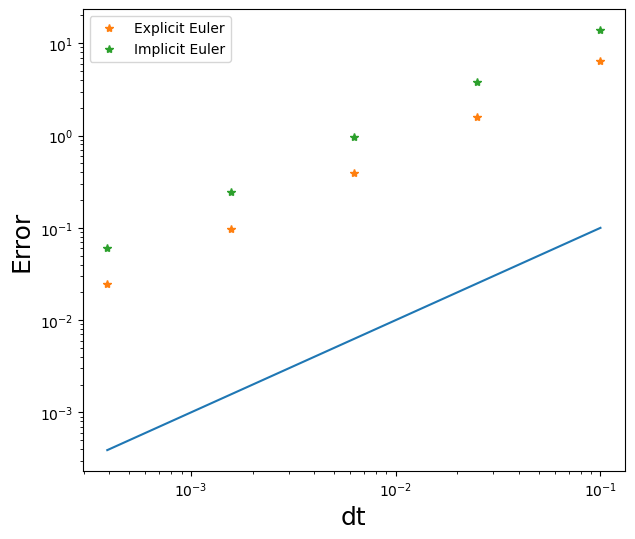

In [8]:
#Plot everything
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.loglog(dts, dts) # Plotting a first ord function
ax.loglog(dts, np.abs(y_forward_final - y_exact_final), '*', label="Explicit Euler") # Plotting the error for Euler Forward 
ax.loglog(dts, np.abs(y_backward_final - y_exact_final), '*', label="Implicit Euler") # Plotting the error for Euler Backward

'''
To plot the error we've used .loglog to get log scale axis.
'''

ax.set_xlabel("dt", fontsize=18)
ax.set_ylabel("Error", fontsize=18)

ax.legend()

### Documentation

Scipy : https://docs.scipy.org/doc/scipy/

Scipy.odeint : https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

np.empty : https://numpy.org/doc/stable/reference/generated/numpy.empty.html

np.arange : https://numpy.org/doc/stable/reference/generated/numpy.arange.html

np.ones : https://numpy.org/doc/stable/reference/generated/numpy.ones.html

np.shape : https://numpy.org/doc/stable/reference/generated/numpy.shape.html

Enumerate : https://www.programiz.com/python-programming/methods/built-in/enumerate

.loglog : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html

## Part 2 : Runge-Kutta

### Exo 1

Solve the equation of the harmonic oscillator using the explicit RK4 method and show that the solution is not blowing up (choose appropriate time step).

System of ODE for the case of harmonic oscillator is given by:

$\displaystyle \frac{dx}{dt} = v$,

$\displaystyle \frac{dv}{dt} = -\gamma^2 x$

***HINT:*** Given initial value problem,

$\displaystyle \frac{du}{dt} = f(t, u),\qquad u(0)=u_0$,

**RK4 algorithm** is defined as follows:

$\displaystyle u^{n + 1} = u^n + \frac{dt}{6} k_1 + \frac{dt}{3} \left( k_2 + k_3 \right) + \frac{dt}{6} k_4$,

with

$k_1 = f(t^n, u^n)$,

$\displaystyle k_2 = f(t^n + \frac{dt}{2}, u^n + \frac{dt}{2} k_1)$,

$\displaystyle k_3 = f(t^n + \frac{dt}{2}, u^n + \frac{dt}{2} k_2)$,

$k_4 = f(t^n + dt, u^n + dt k_3)$.

In [9]:
#Initialise our parameters
k = 2.0
m = 1.0 # Setting up our constant
gamma = np.sqrt(k / m)

xi, vi = 0.75, 0.0 # Initialise our Initial conditions for x and v
ti, tf = 0.0, 40.0 # Initialise our Initial time conditions 
dt = 0.01 # Initialise the size of our time step

In [10]:
#Compute RK4 algorithm
def rk4(u, f, dt):
    # The RHS doesn't depend on time explicitly.
    k1 = f(u)
    k2 = f(u + dt / 2 * k1)
    k3 = f(u + dt / 2 * k2)
    k4 = f(u + dt * k3)
    
    return u + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

'''
Here we've used python definition to create our RK4 algorithm. This function take three arguments (u, f, dt) where 'u' is our varible, 'f' our function
and 'dt' the size of our time step.
Then we return the RK4 approximation.
All of those terms are describe in the course's notebooks (their form are also given above).
Pay attention to define k1, k2, ... in the right order because inside of this 'kn' we use 'kn-1'  
'''

"\nHere we've used python definition to create our RK4 algorithm. This function take three arguments (u, f, dt) where 'u' is our varible, 'f' our function\nand 'dt' the size of our time step.\nThen we return the RK4 approximation.\nAll of those terms are describe in the course's notebooks (their form are also given above).\nPay attention to define k1, k2, ... in the right order because inside of this 'kn' we use 'kn-1'  \n"

Quick remainder : We can write our equation as follow (see chapter 2.2. RungeKutta):

\begin{equation}
    \frac{d}{dt}
    \begin{pmatrix}
        x \\
        v
    \end{pmatrix}
    =
    \begin{pmatrix}
        0 & 1 \\
        -\gamma^2 & 0 
    \end{pmatrix}
    \begin{pmatrix}
        x \\
        v
    \end{pmatrix}
\end{equation}

Where $L = 
\begin{pmatrix}
    0 & 1 \\
    -\gamma^2 & 0
\end{pmatrix}
$.

In [11]:
#Implement the equation above
nt = int((tf - ti) / dt) # Computing the number of time step
t = np.arange(nt + 1) * dt # Computing a time array
L = np.array([[0.0, 1.0], [-gamma ** 2, 0.0]]) # Computing the matrix L

def RHS(u): # Computing the right hand side
    return L @ u

'''
Here we've computed the right hand side of equation (1) above, So L * (x v). To do so I define L as a 2 by 2 numpy array then we use python definition
to compute the right hand side (RHS). Our function RHS(u) take one argument, the variable 'u' (which, here, is the matrix (x v)) and return L @ u which is the product of two matrix.
Note that we've used '@' and not '*'. Basically, '@' is the numpy version of '*', it is faster and better. 
remark : we can also use np.dot(x,y) that takes two arguments and multiply them together. 
'''

u = np.empty((nt + 1, 2)) # Creating our containers to store the solutions
u[0] = xi, vi # Adding the initial conditions

'''
We've created a containers to store our solutions. Note that now our containers is a matrix (nt + 1 x 2) that contains the nt + 1 solutions for 'x' and 'v'.
Then we add our initial condition 'xi' and 'vi'
'''

for i in range(nt): # Using RK4 algortihm at each time step
    u[i + 1] = rk4(u[i], RHS, dt)

'''
We've used a for loop that compute the RK4 algorithm for each time step.
'''

"\nWe've used a for loop that compute the RK4 algorithm for each time step.\n"

The exact solution of our equation is
\begin{equation}
    x(t) = c_1 \cos{\gamma t} + c_2 \sin{\gamma t}
\end{equation}

\begin{equation}
    v(t) = -c_1 \gamma \sin{\gamma t} + c_2 \gamma \cos{\gamma t}
\end{equation}

with constants $c_1$ and $c_2$ defined by initial conditions $x_0$ and $v_0$ as follows,
\begin{equation}
    c_1 = x_0, \quad c_2 = v_0 / \gamma
\end{equation}

Let's implemented it

In [12]:
# Compute the exact solution
c1 = xi # Computing our two constante
c2 = vi / gamma

def xexact(t): #Computing exact solution for x
    return c1 * np.cos(gamma * t) + c2 * np.sin(gamma * t)

def vexact(t): #Computing exact solution for v
    return -c1 * gamma * np.sin(gamma * t) + c2 * gamma * np.cos(gamma * t)

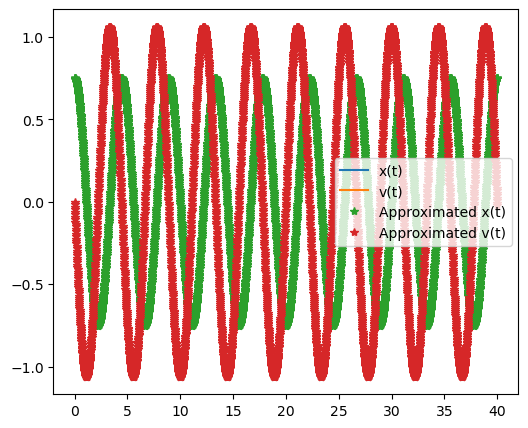

In [13]:
#Plot everything
fig, ax = plt.subplots(1, figsize=(6, 5))

ax.plot(t, xexact(t), label="x(t)")
ax.plot(t, vexact(t), label="v(t)")

ax.plot(t, u[:, 0], "*", label="Approximated x(t)")
ax.plot(t, u[:, 1], "*", label="Approximated v(t)")

'''
Here y[:, 0] means that we are only taking the first column (the 'x' values) and y[:, 1] the second column (the 'v' values)
'''

ax.legend()

In [14]:
print(np.allclose(xexact(t), u[:, 0]))

'''
We've used the function np.allclose to know if our RK4 approximation of the solution is close enough from the exact solution 
'''

True


"\nWe've used the function np.allclose to know if our RK4 approximation of the solution is close enough from the exact solution \n"